In [1]:
library(tidyverse)
library(arrow)
library(ggplot2)
library(ggthemes)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'arrow'


The following object is masked from 'package:utils':

    timestamp




In [2]:
bikedata <- arrow::read_parquet(".././data/bikeshare-data.parquet")

In [3]:
str(bikedata)

tibble [974 x 10] (S3: tbl_df/tbl/data.frame)
 $ trip_date    : Date[1:974], format: "2018-01-01" "2018-01-02" ...
 $ trip_count   : int [1:974] 1099 3796 4742 2359 2735 1510 1719 4099 6119 7109 ...
 $ total_seconds: num [1:974] 1057878 2840648 3342920 1373034 1643926 ...
 $ AWND         : num [1:974] 11.63 7.83 3.8 19.91 15.66 ...
 $ PRCP         : num [1:974] 0 0 0 0.1 0 0 0 0.06 0 0 ...
 $ SNOW         : num [1:974] 0 0 0 0.8 0 0 0 0 0 0 ...
 $ SNWD         : num [1:974] 0 0 0 1.2 1.2 0 0 0 0 0 ...
 $ TAVG         : num [1:974] 19 18 23 26 17 15 15 25 38 36 ...
 $ TMAX         : int [1:974] 26 26 35 27 21 21 23 39 51 43 ...
 $ TMIN         : int [1:974] 13 13 13 16 13 11 8 19 30 27 ...


In [4]:
summary(bikedata)

   trip_date            trip_count    total_seconds           AWND       
 Min.   :2018-01-01   Min.   :  581   Min.   :  631734   Min.   : 1.120  
 1st Qu.:2018-09-01   1st Qu.: 5835   1st Qu.: 5308811   1st Qu.: 6.490  
 Median :2019-05-02   Median : 8231   Median : 9525331   Median : 8.050  
 Mean   :2019-05-02   Mean   : 8566   Mean   :10254428   Mean   : 8.611  
 3rd Qu.:2019-12-31   3rd Qu.:11894   3rd Qu.:13633119   3rd Qu.:10.510  
 Max.   :2020-08-31   Max.   :19199   Max.   :44601450   Max.   :29.970  
                                                                         
      PRCP             SNOW              SNWD             TAVG      
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :15.00  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:45.00  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :60.00  
 Mean   :0.1483   Mean   :0.02403   Mean   :0.0408   Mean   :60.19  
 3rd Qu.:0.0800   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:76

In [5]:
bikedata <- bikedata %>%
    mutate(avg_sec_per_trip = total_seconds/trip_count,
           avg_min_per_trip = avg_sec_per_trip/60,
           year = factor(lubridate::year(trip_date)),
           month = lubridate::month(trip_date, label = TRUE),
           wday = lubridate::wday(trip_date, label = TRUE))

In [6]:
head(bikedata)

trip_date,trip_count,total_seconds,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,avg_sec_per_trip,avg_min_per_trip,year,month,wday
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>,<ord>,<ord>
2018-01-01,1099,1057878,11.63,0.0,0.0,0.0,19,26,13,962.5823,16.043039,2018,Jan,Mon
2018-01-02,3796,2840648,7.83,0.0,0.0,0.0,18,26,13,748.3267,12.472111,2018,Jan,Tue
2018-01-03,4742,3342920,3.80,0.0,0.0,0.0,23,35,13,704.9599,11.749332,2018,Jan,Wed
2018-01-04,2359,1373034,19.91,0.1,0.8,1.2,26,27,16,582.0407,9.700678,2018,Jan,Thu
2018-01-05,2735,1643926,15.66,0.0,0.0,1.2,17,21,13,601.0698,10.017831,2018,Jan,Fri
2018-01-06,1510,965617,13.42,0.0,0.0,0.0,15,21,11,639.4815,10.658024,2018,Jan,Sat


In [7]:
# correlation
bike_numeric <- bikedata %>%
    select(-trip_date, -year, -month, -wday)
b_cor <- round(cor(bike_numeric, use = 'complete.obs'), 2)
upper <- b_cor
upper[upper.tri(b_cor, diag = TRUE)]<-""
upper <- as.data.frame(upper)
upper

,trip_count,total_seconds,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,avg_sec_per_trip,avg_min_per_trip
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
trip_count,,,,,,,,,,,
total_seconds,0.79,,,,,,,,,,
AWND,-0.19,-0.18,,,,,,,,,
PRCP,-0.24,-0.2,0.05,,,,,,,,
SNOW,-0.13,-0.11,0.05,0.08,,,,,,,
SNWD,-0.12,-0.11,-0.01,-0.01,0.26,,,,,,
TAVG,0.6,0.66,-0.17,0.08,-0.12,-0.14,,,,,
TMAX,0.63,0.68,-0.2,0.04,-0.14,-0.15,0.98,,,,
TMIN,0.57,0.63,-0.21,0.1,-0.1,-0.13,0.98,0.95,,,


`geom_smooth()` using formula 'y ~ x'



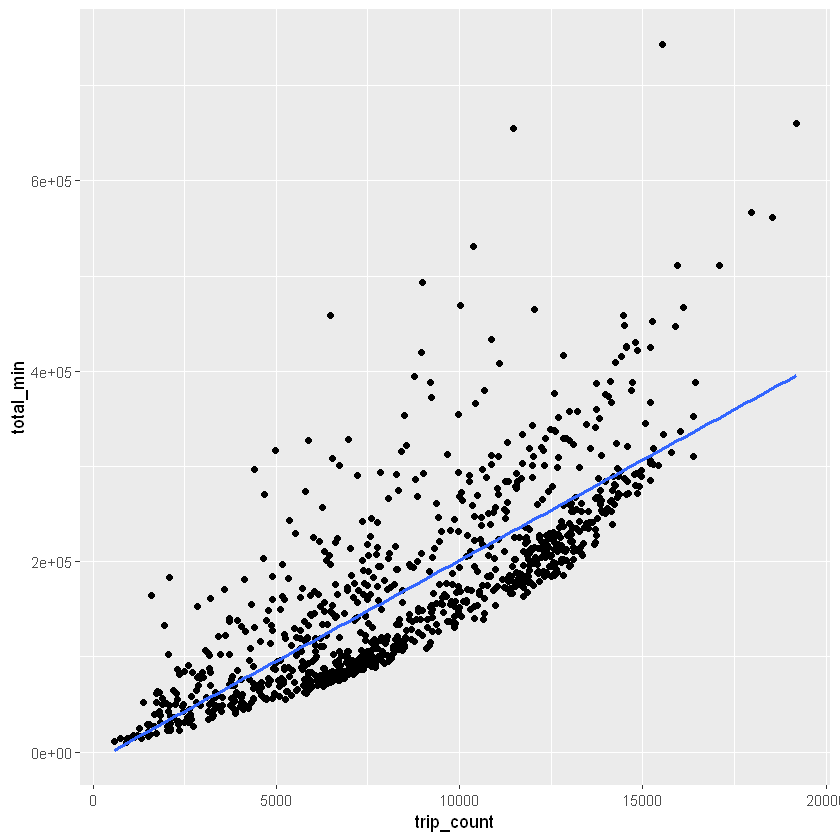

In [16]:
bikedata %>%
    mutate(total_min = total_seconds / 60) %>%
    ggplot(aes(x = trip_count, y = total_min)) +
    geom_point() +
    geom_smooth(method = lm, se = FALSE)

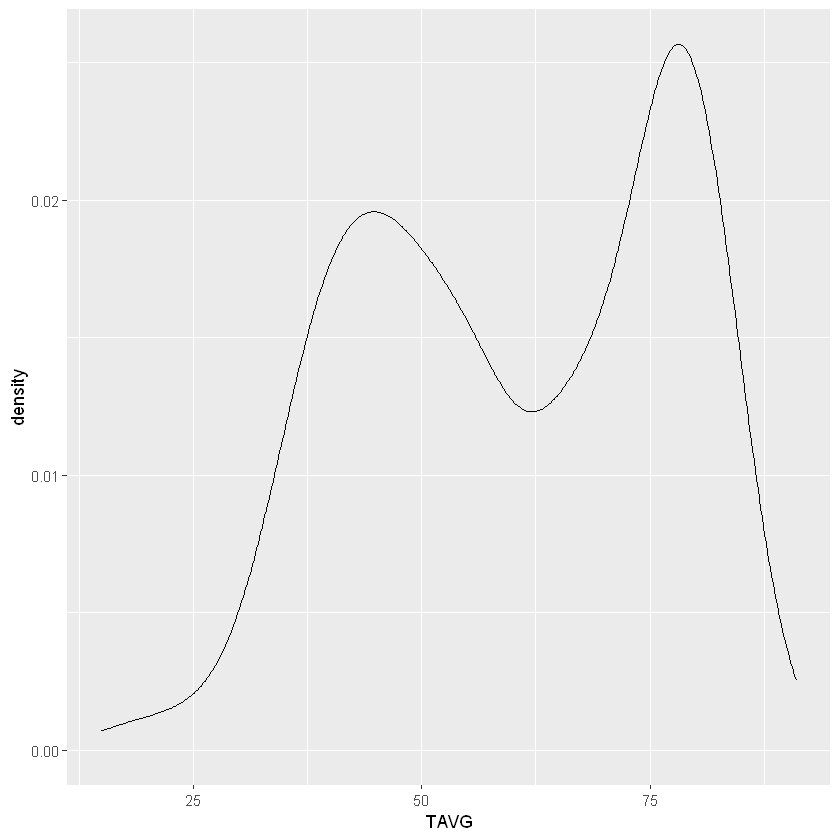

In [9]:
bikedata %>%
    filter(!is.na(TAVG)) %>%
    ggplot(aes(x = TAVG)) +
    geom_density()

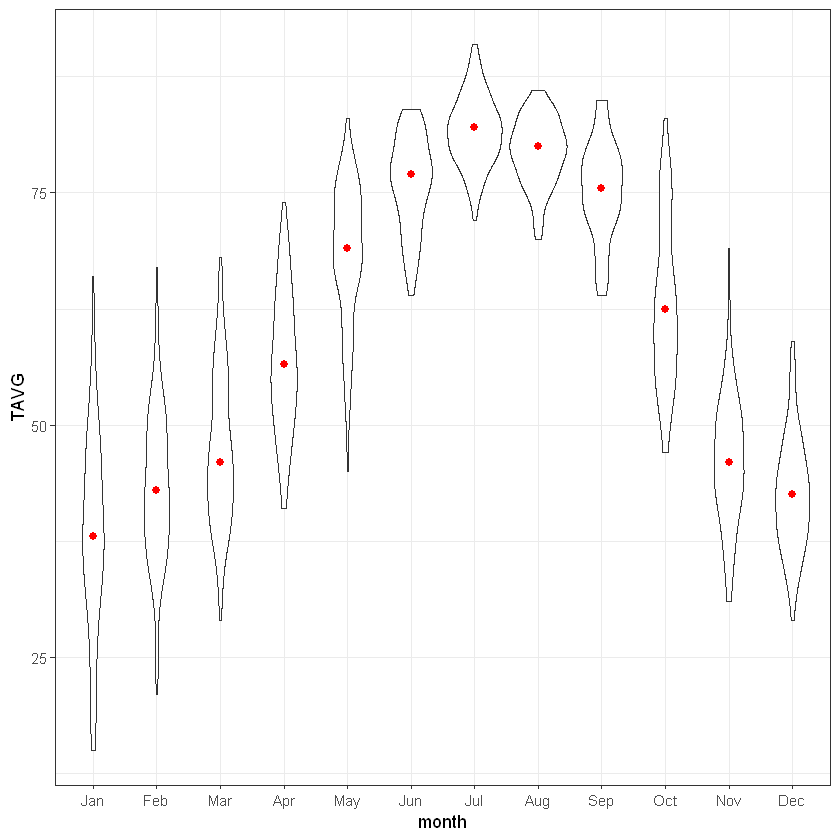

In [10]:
bikedata %>%
    filter(!is.na(TAVG)) %>%
    ggplot(aes(x = month, y = TAVG)) +
    geom_violin() +
    stat_summary(fun = median, geom = "point", size = 2, color = "red") +
    theme_bw()

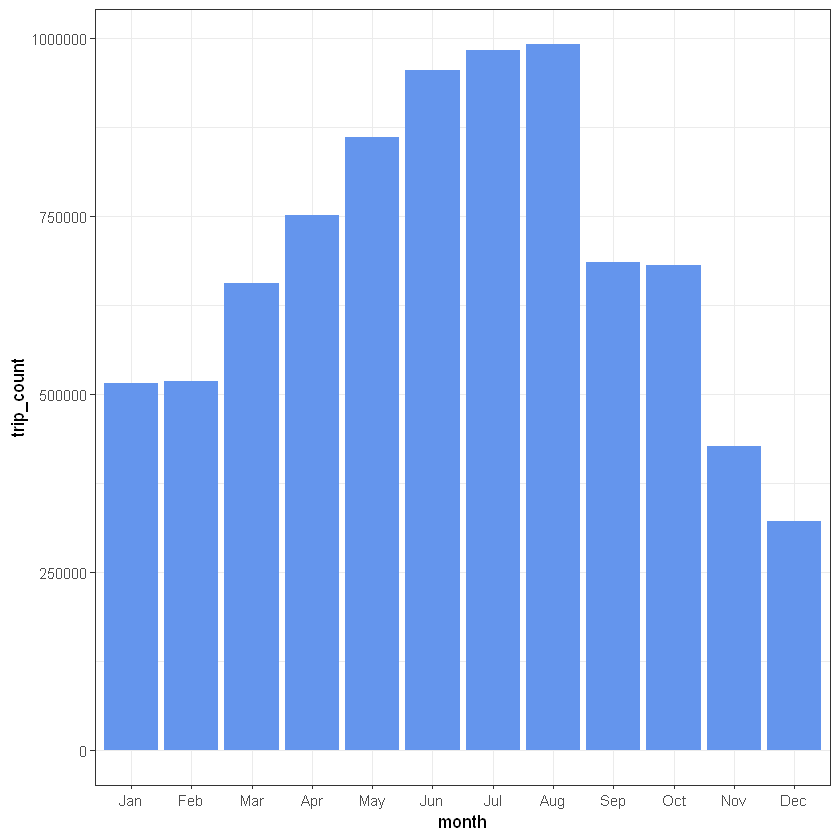

In [11]:
bikedata %>%
    ggplot(aes(x = month, y = trip_count, group = 1)) +
    geom_bar(stat = "identity", fill = "cornflowerblue") +
    theme_bw()

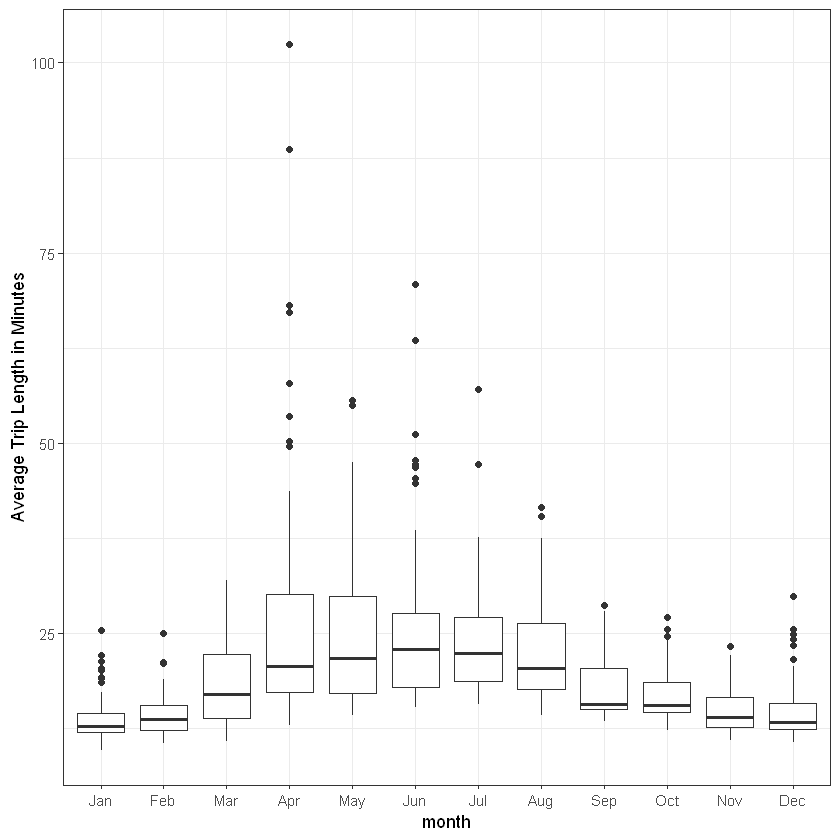

In [12]:
bikedata %>%
    ggplot(aes(x = month, y = avg_min_per_trip)) +
    geom_boxplot() +
    ylab("Average Trip Length in Minutes") +
    theme_bw()

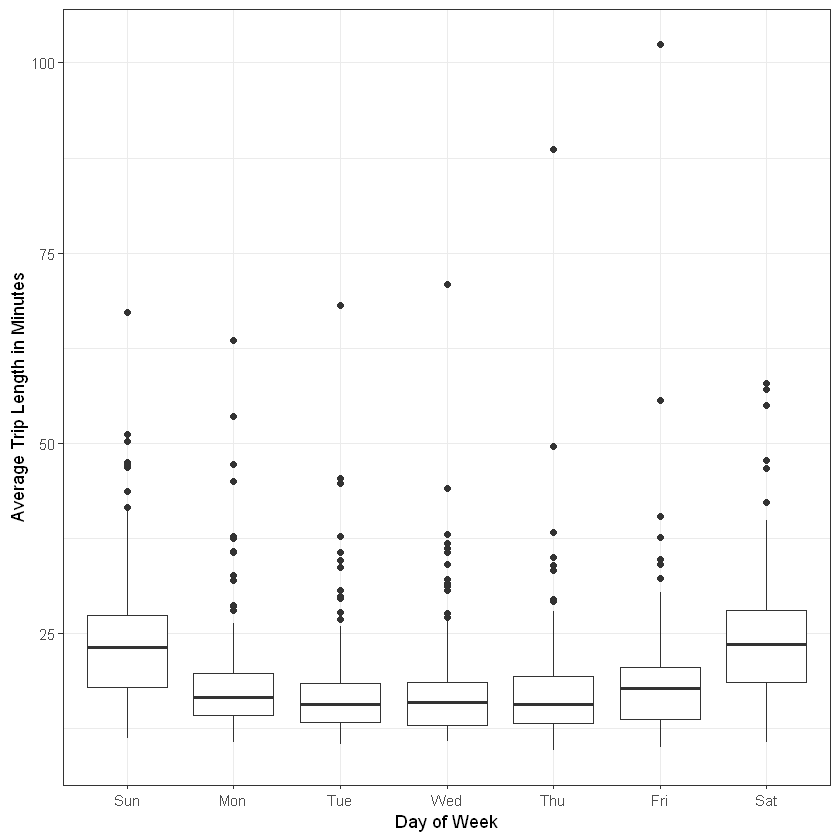

In [13]:
bikedata %>%
    ggplot(aes(x = wday, y = avg_min_per_trip)) +
    geom_boxplot() +
    ylab("Average Trip Length in Minutes") +
    xlab("Day of Week") +
    theme_bw()

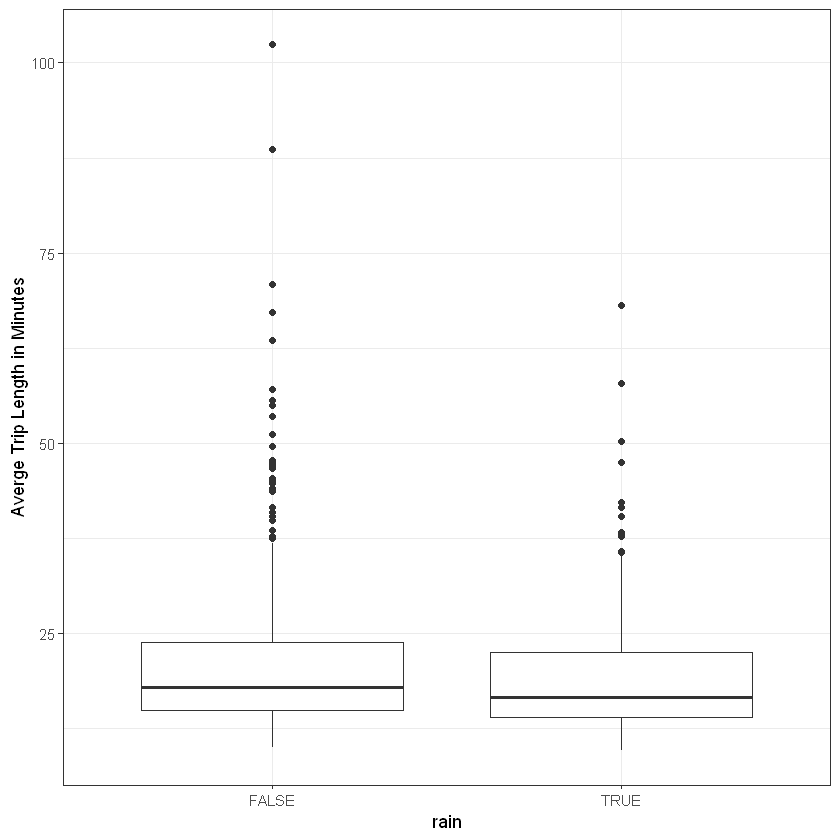

In [14]:
bikedata %>%
    mutate(rain = as.factor(PRCP > 0.0)) %>%
    select(rain, avg_min_per_trip) %>%
    ggplot(aes(x = rain, y = avg_min_per_trip)) +
    geom_boxplot() +
    ylab("Averge Trip Length in Minutes") +
    theme_bw()

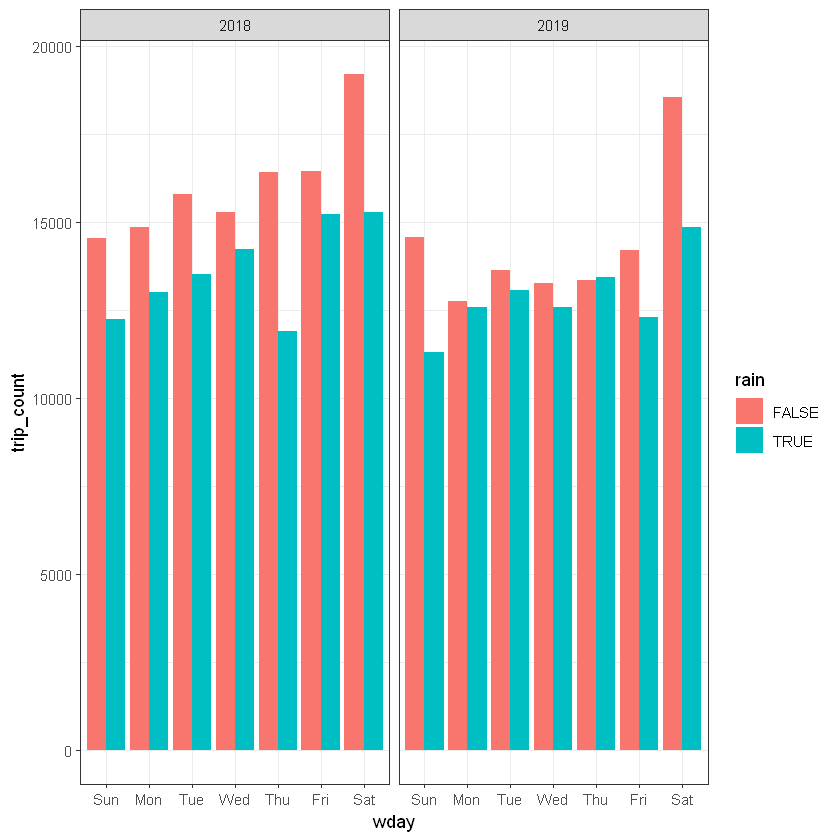

In [15]:
bikedata %>%
    filter(year %in% c('2018', '2019')) %>%
    mutate(rain = as.factor(PRCP > 0.0)) %>%
    ggplot(aes(x = wday, y = trip_count, group = rain)) +
    geom_bar(aes(fill = rain), stat = "identity", position = "dodge") +
    theme_bw() +
    facet_grid(. ~ year)